<a href="https://colab.research.google.com/github/Modinat-A/Diabeties-Prediction/blob/main/CE802_P2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative analysis of Classifers 

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import itertools
import sklearn as skl
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import MinMaxScaler
import pickle as pkl

In [ ]:
df= pd.read_csv('CE802_P2_Data.csv')

In [ ]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,-4.569780,-20.474600,109.024667,12.744707,-6.248787,14.90628,13.107813,-42.25600,-557.610667,10.806667,3.878840,108.488000,3.854280,0.147533,5.783013
std,7.662813,7.635517,117.334580,2.217929,2.540644,12.97563,3.166909,14.31863,142.833748,9.009814,7.541549,80.376896,3.465276,2.491236,1.005117
min,-29.760000,-45.570000,0.000000,8.020000,-15.280000,0.00000,9.420000,-76.98000,-888.720000,0.000000,-19.110000,-120.340000,0.000000,-4.360000,3.060000
25%,-10.260000,-26.130000,15.000000,11.440000,-8.130000,3.72000,10.140000,-56.98000,-678.720000,2.000000,-1.950000,71.660000,0.600000,-2.230000,5.062500
50%,-7.560000,-23.445000,50.000000,12.440000,-7.230000,6.21000,10.500000,-34.98000,-486.720000,2.000000,0.930000,97.660000,1.020000,1.100000,5.790000
75%,2.917500,-13.110000,195.000000,13.900000,-3.770000,24.60000,15.870000,-30.98000,-446.720000,20.000000,11.100000,139.660000,7.050000,1.982500,6.530000
max,8.850000,-6.780000,390.000000,21.220000,-1.590000,47.10000,19.570000,-24.98000,-398.720000,20.000000,17.310000,309.660000,10.350000,7.880000,8.140000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   int64  
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


In [ ]:
# check if data is balanced
df['Class'].value_counts()

False    809
True     691
Name: Class, dtype: int64

In [ ]:
# Check number of null values in columns
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [ ]:
cleanup = {"Class": {True:1,False:0}}
df.replace(cleanup, inplace=True)

In [ ]:
df.drop('F15', axis=1,inplace=True)

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14'])

Data Visualization

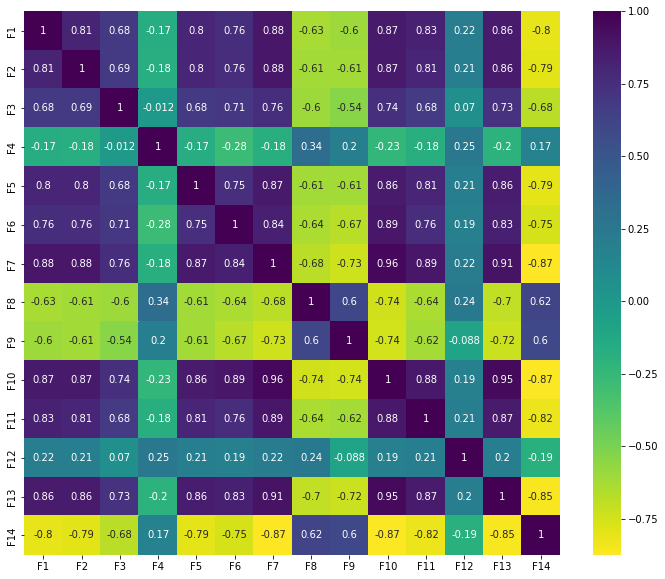

In [ ]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(X.corr(), annot=True,cmap ='viridis_r')

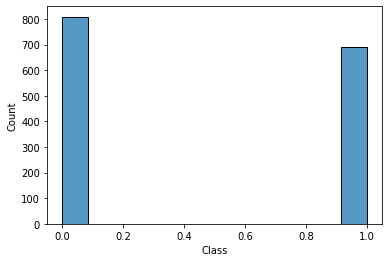

In [ ]:
_ = sns.histplot(y, kde=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

# Descision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0) #“entropy” for the information gain.
clf.fit(X_train, y_train)
#check accuracy score
scores = cross_val_score(clf,X_train, y_train, cv=10,scoring=make_scorer(acc))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))
#check f1 score
scores = cross_val_score(clf,X_train, y_train, cv=10,scoring=make_scorer(f1))  # cross-validation
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.77 +/- 0.03
F1: 0.75 +/- 0.04


In [ ]:
# predict on test data
y_pred = clf.predict(X_test)
print("Accuracy Score =", format(acc(y_test,y_pred)))

Accuracy Score = 0.78


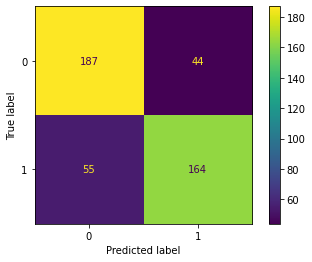

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = skl.metrics.ConfusionMatrixDisplay(confusion_matrix=cm)  
disp.plot()
plt.savefig('cmdt.png')
plt.show()

In [ ]:
from sklearn import tree
text_representation = tree.export_text(clf)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns.values,  
                   class_names=['True','False'],
                   filled=True)
fig.savefig("decistion_tree.png")

# Support vector machine

In [ ]:
from sklearn import svm

#Create a svm Classifier
svmclf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svmclf.fit(X_train, y_train)

#check accuracy score
scores = cross_val_score(svmclf,X_train, y_train, cv=10,scoring=make_scorer(acc))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))
#check f1 score
scores = cross_val_score(svmclf,X_train, y_train, cv=10,scoring=make_scorer(f1))  # cross-validation
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.78 +/- 0.06
F1: 0.77 +/- 0.05


In [ ]:
y_pred = svmclf.predict(X_test)
print("Accuracy Score = %.2f" % (acc(y_test,y_pred)))
y_pred = svmclf.predict(X_test)
print("F1 Score = %.2f" % (f1(y_test,y_pred)))

Accuracy Score = 0.77
F1 Score = 0.77


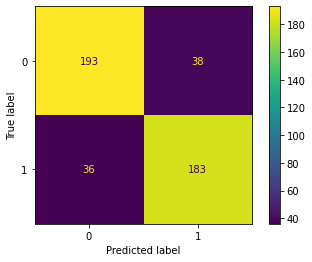

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = skl.metrics.ConfusionMatrixDisplay(confusion_matrix=cm)  
disp.plot()
plt.savefig('cmsv.png')
plt.show()


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfclf = RandomForestClassifier(criterion='entropy', random_state=0)

# Train the model using the training sets
rfclf.fit(X_train, y_train)

#check accuracy score
scores = cross_val_score(rfclf,X_train, y_train, cv=10,scoring=make_scorer(acc))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))
#check f1 score
scores = cross_val_score(rfclf,X_train, y_train, cv=10,scoring=make_scorer(f1))  # cross-validation
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.83 +/- 0.05
F1: 0.81 +/- 0.06


In [ ]:
#Predict y for test dataset
y_pred = rfclf.predict(X_test)
print("Accuracy Score = %.2f" % (acc(y_test,y_pred)))
y_pred = rfclf.predict(X_test)
print("F1 = %.2f" % (f1(y_test,y_pred)))

Accuracy Score = 0.82
F1 = 0.82


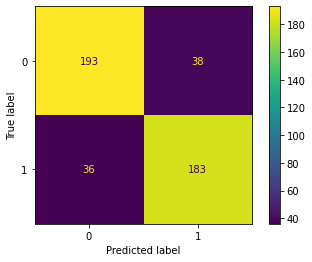

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = skl.metrics.ConfusionMatrixDisplay(confusion_matrix=cm)  
disp.plot()
plt.savefig('cmrf.png')
plt.show()


# Prediction on Test Data

In [ ]:
# Predictions on test data
test_data = pd.read_csv('CE802_P2_Test.csv')
x = test_data.drop(['F15','Class'], axis=1)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_scaled = scaler.fit_transform(x)
x_test = pd.DataFrame(x_scaled,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14'])

In [ ]:
# save model 
saved_model = pkl.dumps(svmclf)
model = pkl.loads(saved_model)

In [ ]:
y_test = model.predict(x_test)

In [ ]:
y_test= np.where(y_test == 1,"True","False")

In [ ]:
test_data['Class'] = y_test

In [ ]:
test_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-8.67,-25.56,21,13.14,-7.45,5.55,10.29,-30.98,-476.72,2,-1.17,61.66,0.23,3.76,7.60,True
1,-8.31,-29.19,10,12.16,-7.66,5.22,10.22,-30.98,-422.72,2,-0.96,79.66,0.02,1.22,6.72,True
2,-0.84,-25.29,110,12.34,-3.72,20.70,17.32,-76.98,-778.72,20,11.10,-20.34,5.75,-1.97,NaN,False
3,0.90,-14.94,120,9.44,-3.44,28.05,15.52,-56.98,-858.72,20,6.33,229.66,8.05,-1.77,NaN,False
4,-0.33,-9.60,345,14.26,-3.32,34.80,15.07,-36.98,-458.72,20,12.18,129.66,9.80,-2.17,6.60,True


In [ ]:
#save predictions to csv
test_data.to_csv('CE802_P2_Test.csv')